In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

from agent import workflow

In [13]:
#define state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [5]:
def calculate_bmi(state:BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    state['bmi'] = weight/(height*height)
    return state

In [15]:
def label_bmi(state:BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 25:
        state['category'] = 'Normal'
    elif 25 <= bmi < 30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'

    return state


In [16]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

#add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

#compile the graph

workflow = graph.compile()

In [17]:
initial_state = {'weight_kg':80,'height_m':1.85}
final_state = workflow.invoke(initial_state)
print(final_state)

{'weight_kg': 80, 'height_m': 1.85, 'bmi': 23.37472607742878, 'category': 'Normal'}


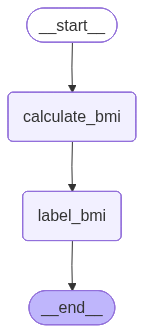

In [18]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())